In [146]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

sr_no = []
time = []
current = []
voltage = []
temperature = []
index_with_nan = []
num_samples = 1001
base_timestamp = pd.Timestamp("2023-08-05")


'''
This code is for creating the random dataset with filling some null values
'''

#for i in range(1,1001):
#    sr_no.append(i)
#    time.append(base_timestamp + timedelta(seconds=i))
#    current.append(random.uniform(1.0,1.50))
#    voltage.append(random.uniform(2.6,4.2))
#    temperature.append(np.random.randint(25,28))
#    
#    
#data = {"Sr. No." : sr_no, "Time" : time, "Current" : current, "Voltage" : voltage, "Temperature" : temperature}
#
#df = pd.DataFrame(data)
#df.set_index("Sr. No.", inplace=True)
#df.reset_index(drop=True, inplace=True)
#df.to_csv(r"C:\Users\SanjayPanchal\Downloads\Demo Dataset for ampBI.csv")
#
#range_list = [*range(150,180), *range(550,560), *range(800,950)]
#
#for index in range_list:
#    df["Current"][index] = float('nan')
#    df["Voltage"][index] = float('nan')
#    df["Temperature"][index] = float('nan')
    

'''   
Here we are trying to sort only one column which is voltage that for this created 2 dataframes, 1 is for sorting by index
and second for sorting the values by voltage and then concating the dataframes to solve the reset index issues.

Here is also defined the mean value of Current.
'''

for i in range(1,num_samples):
    sr_no.append(i)
    time.append(base_timestamp + timedelta(seconds=i))
    
#def generate_current_with_specified_mean(target_mean):
#    lower_curr = 0.48
#    upper_curr = 13.5
#    current_uniform = [random.uniform(lower_curr,upper_curr) for _ in range(num_samples-1)]
#    return current_uniform
#
#current = generate_current_with_specified_mean(3.5)
#current.sort()

for i in range(1,num_samples):
    current.append(random.uniform(0.48,0.48*15))
current.sort()
    
for i in range(1,num_samples):
    voltage.append(random.uniform(2.6,4.2))
    temperature.append(np.random.randint(25,28+1))
    
    
data_1 = {"Sr. No." : sr_no, "Time" : time}
data_2 = {"Current" : current} 
data_3 = {"Voltage" : voltage, "Temperature" : temperature}

df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
df_3 = pd.DataFrame(data_3)

df_3.sort_values(by="Voltage", inplace=True)

df_2.reset_index(drop=True, inplace=True)
df_3.reset_index(drop=True, inplace=True)

df = pd.concat([df_1,df_2,df_3], axis=1)
df.set_index("Sr. No.", inplace=True)
df.to_csv(r"C:\Users\SanjayPanchal\Downloads\Demo Dataset for ampBI (with null values).csv")

#range_list = [*range(150,180), *range(350,400), *range(550,560), *range(800,950)]  
range_list = [*np.random.randint(1,1000,300)]

for x in range_list:
    if x not in index_with_nan:
        index_with_nan.append(x)

for index in index_with_nan:
    df["Current"][index] = float('nan')
    df["Voltage"][index] = float('nan')
    df["Temperature"][index] = float('nan')
    
duplicate_data_rows = df.head(np.random.randint(1,300))
duplicate_data_rows_count = len(duplicate_data_rows)
duplicate_data_rows["Sample"] = np.random.randint(1,1000,duplicate_data_rows_count)
duplicate_data_rows.set_index("Sample", inplace=True)
final_df = pd.concat([df, duplicate_data_rows])
final_df.sort_index(inplace=True)
final_df.to_csv(r"C:\Users\SanjayPanchal\Downloads\Demo Dataset for ampBI (with value errors).csv")

# Total length of Dataset

print("Total Raws Present of Dataset---", len(final_df))

# Duplicate Rows in dataset
print("Duplicate Raws in Dataset---", final_df.duplicated().sum())

# Null Values in Dataset
print("\n\nNull Values in Dataset---")
final_df.isnull().sum()

Total Raws Present of Dataset--- 1134
Duplicate Raws in Dataset--- 134


Null Values in Dataset---


Time             0
Current        287
Voltage        287
Temperature    287
dtype: int64

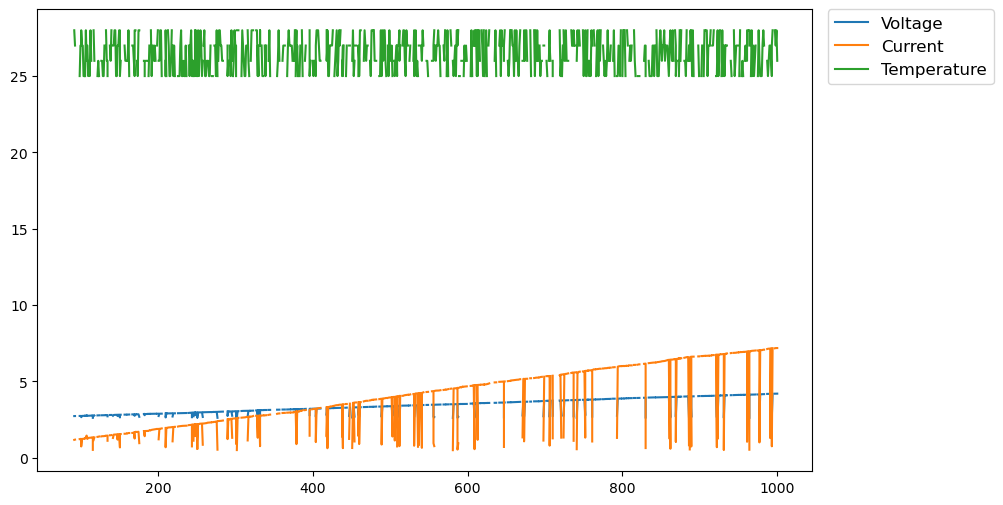

In [147]:
# Plot with Null Values


plt.figure(figsize=(10,6))

plt.plot(final_df["Voltage"][100:], label="Voltage")
plt.plot(final_df["Current"][100:], label="Current")
plt.plot(final_df["Temperature"][100:], label="Temperature")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.,fontsize='large')
plt.show()

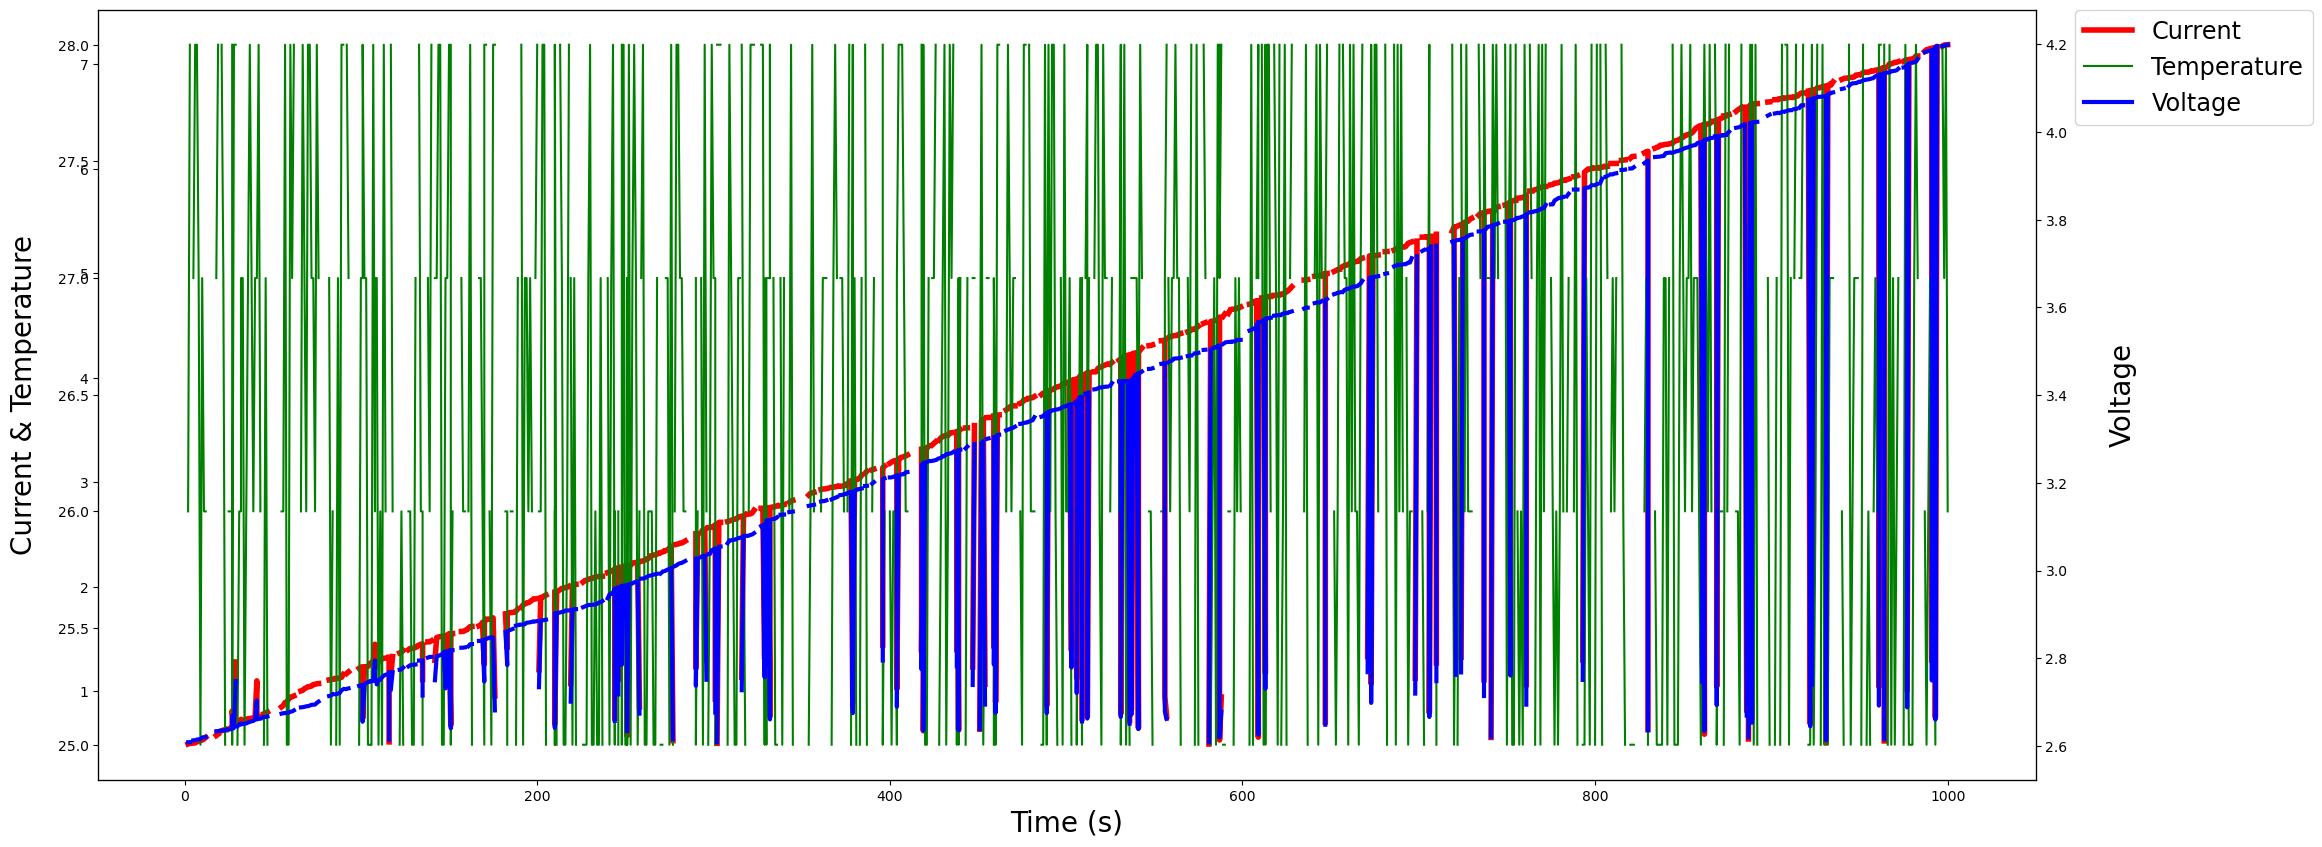

In [148]:
# Plot with Null Values


fig, ax = plt.subplots(figsize=(25,10))
ax1 = ax.twinx()
ax2 = ax1.twinx()
ax.plot(final_df["Current"], color="red", label="Current", linewidth=4)
ax1.plot(final_df["Temperature"], color='green', label="Temperature")
ax2.plot(final_df["Voltage"], color='blue', label="Voltage", linewidth=3)
line, labels = ax.get_legend_handles_labels()
line2, labels2 = ax1.get_legend_handles_labels()
line3, labels3 = ax2.get_legend_handles_labels()
ax2.legend(line + line2 + line3, labels + labels2 + labels3, loc='upper left', bbox_to_anchor=(1.02, 1),
           borderaxespad=0.,fontsize='xx-large')
ax.set_xlabel("Time (s)", fontsize=20)
ax.set_ylabel("Current & Temperature", labelpad=30, fontsize=20)
ax2.set_ylabel("Voltage", labelpad=30,fontsize=20)
#ax.grid(True)
#ax1.grid(True)
#ax2.grid(True)
plt.show()

In [149]:
# Removing duplicated
final_df.drop_duplicates(inplace=True)

# Forward-fill missing values
final_df.ffill(inplace=True)

# Backward-fill missing values
final_df.bfill(inplace=True)


final_df.to_csv(r"C:\Users\SanjayPanchal\Downloads\Demo Dataset for ampBI (without value errors).csv")

print("After handling the duplicate values and missing values :\n","_"*56, sep="",)

# Total length of Dataset

print("\nTotal Raws Present of Dataset---", len(final_df))

# Duplicate Rows in dataset
print("Duplicate Raws in Dataset---", final_df.duplicated().sum())

# Null Values in Dataset
print("\n\nNull Values in Dataset---")
final_df.isnull().sum()

After handling the duplicate values and missing values :
________________________________________________________

Total Raws Present of Dataset--- 1000
Duplicate Raws in Dataset--- 0


Null Values in Dataset---


Time           0
Current        0
Voltage        0
Temperature    0
dtype: int64

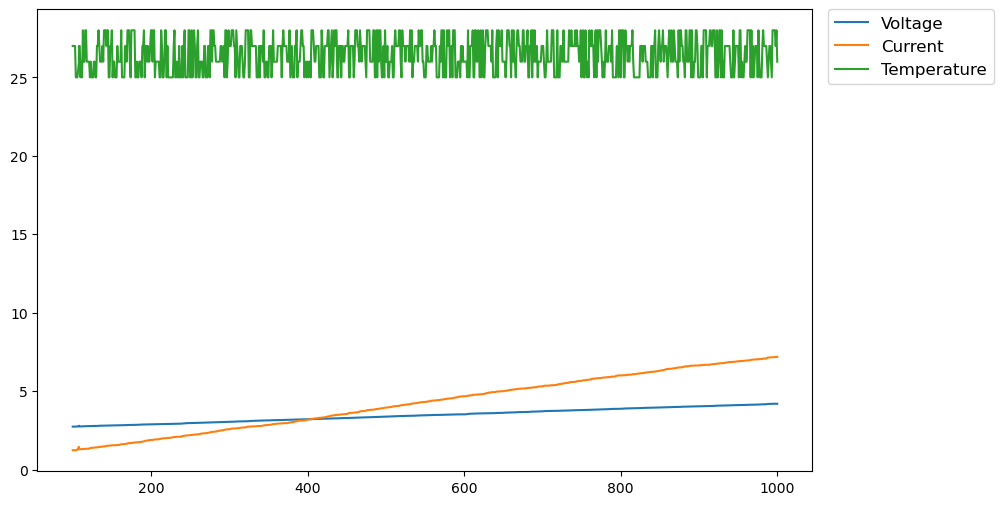

In [152]:
# Plot after Null Values


plt.figure(figsize=(10,6))

plt.plot(final_df["Voltage"][100:], label="Voltage")
plt.plot(final_df["Current"][100:], label="Current")
plt.plot(final_df["Temperature"][100:], label="Temperature")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.,fontsize='large')
plt.show()

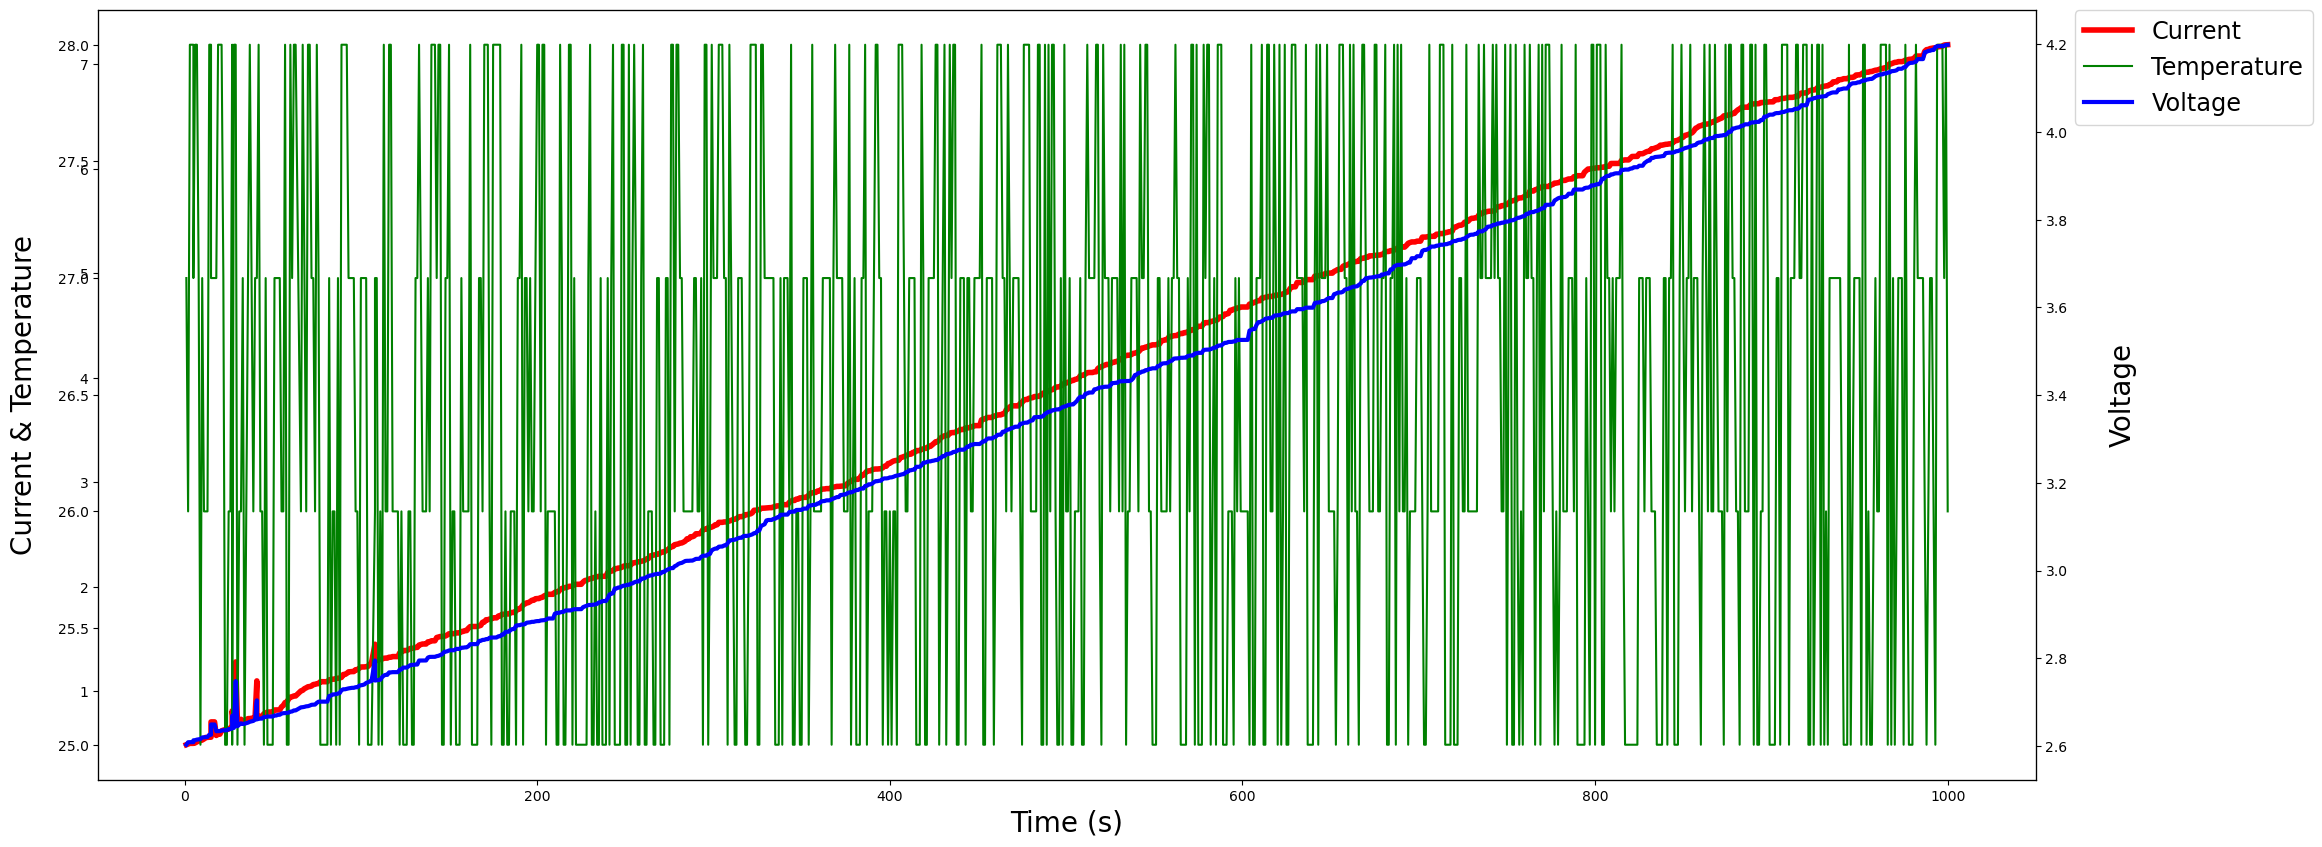

In [153]:
# Plot after Null Values


fig, ax = plt.subplots(figsize=(25,10))
ax1 = ax.twinx()
ax2 = ax1.twinx()
ax.plot(final_df["Current"], color="red", label="Current", linewidth=4)
ax1.plot(final_df["Temperature"], color='green', label="Temperature")
ax2.plot(final_df["Voltage"], color='blue', label="Voltage", linewidth=3)
line, labels = ax.get_legend_handles_labels()
line2, labels2 = ax1.get_legend_handles_labels()
line3, labels3 = ax2.get_legend_handles_labels()
ax2.legend(line + line2 + line3, labels + labels2 + labels3, loc='upper left', bbox_to_anchor=(1.02, 1),
           borderaxespad=0.,fontsize='xx-large')
ax.set_xlabel("Time (s)", fontsize=20)
ax.set_ylabel("Current & Temperature", labelpad=30, fontsize=20)
ax2.set_ylabel("Voltage", labelpad=30,fontsize=20)
#ax.grid(True)
#ax1.grid(True)
#ax2.grid(True)
plt.show()

In this example, the duplicated() function is used to identify duplicate rows in the DataFrame. The shift() function is used to compare each row with its previous row to identify the first occurrence of each duplicated pattern. Finally, the mask is applied to the DataFrame to retain only the unique pattern while preserving the duplicates.

Note that this approach assumes that the order of the duplicates matters and the first occurrence should be retained. If the order doesn't matter and you simply want to remove all duplicates, you can use the drop_duplicates() function: